In [10]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
%autoreload

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from utils.backtest_utils import BackTestAnalysis

%matplotlib inline

In [95]:
import yfinance as yf

spx = yf.Ticker("ES=F")
data = spx.history(period="3Y")
futures_ohlc = data.reset_index()
#random predictions
#futures_ohlc['prediction'] = np.random.randint(-1,2,size=len(data))

In [96]:
futures_ohlc['Close_pct_change'] = futures_ohlc['Close'].pct_change()
futures_ohlc['prediction'] = (futures_ohlc['Close_pct_change'].rolling(2).mean()>0).astype(int)


In [97]:
futures_ohlc.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_pct_change,prediction
0,2020-04-13,2811.00,2819.5,2711.00,2759.25,1571402,0,0,NaN,0
1,2020-04-14,2760.00,2846.0,2752.50,2843.00,1716496,0,0,0.030352,0
2,2020-04-15,2843.75,2845.5,2751.25,2775.00,1831570,0,0,-0.023918,1
3,2020-04-16,2767.75,2831.5,2746.00,2787.50,1749108,0,0,0.004505,0
4,2020-04-17,2863.00,2885.0,2821.00,2870.00,1924019,0,0,0.029596,1


## Below Function Backtest the Signals on close to close daily trading strategy, given a signal from model from that day.

#### For simple purposes, I have simply used a strategy if my 2 day rolling percent change in close prices from previous day is above 0, I go long next day. Otherwise I am out.

Model Conventions :
*  1 : LONG
*  0 : OUT
* -1 : SHORT

**Following are the Plots and Stats**
* Standard Metrics : Total Returns, Daily Sharpe, MaxDrawDown, Daily Volatility (For all three models without StopLoss, with StopLoss, Leverage with Stoploss.
* Then it show percentage of days you were Long, out , Short
* Next plot shows, Histogram of Returns with StopLoss
* Next are rolling standard metrics of  (Total Returns, Daily Sharpe, MaxDrawDown, Daily Volatility) to see how consistent are returns on 22 days periods, how they vary, their Average ,Max, Min that you have seen in historical backtest, etc. ( you change the rolling window.)
* Then Comes stoploss hit percent. How many consecutive stoploss hits have happened.
* Then comes the Rolling analysis of How many stoploss you are hitting in 7 day rolling period.
* Then Comes analysis of your rolling returns vary with change in market volatility.

division by zero
Start Date :  2020-04-13  End Date :  2023-04-11


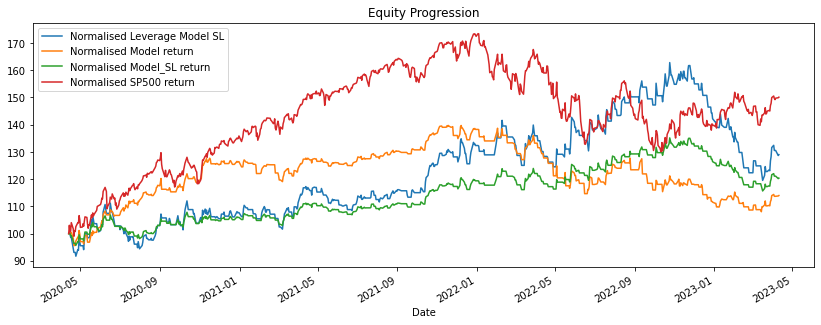

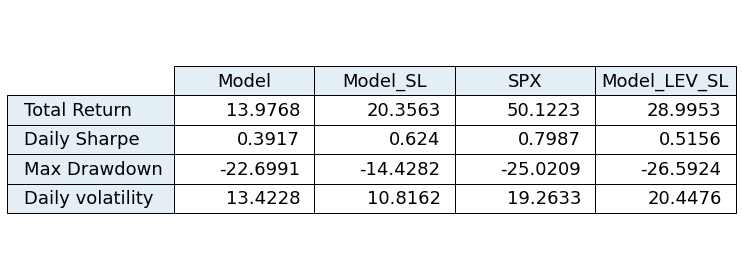

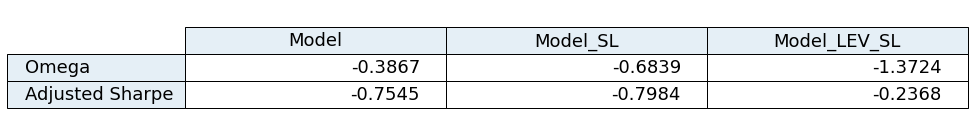

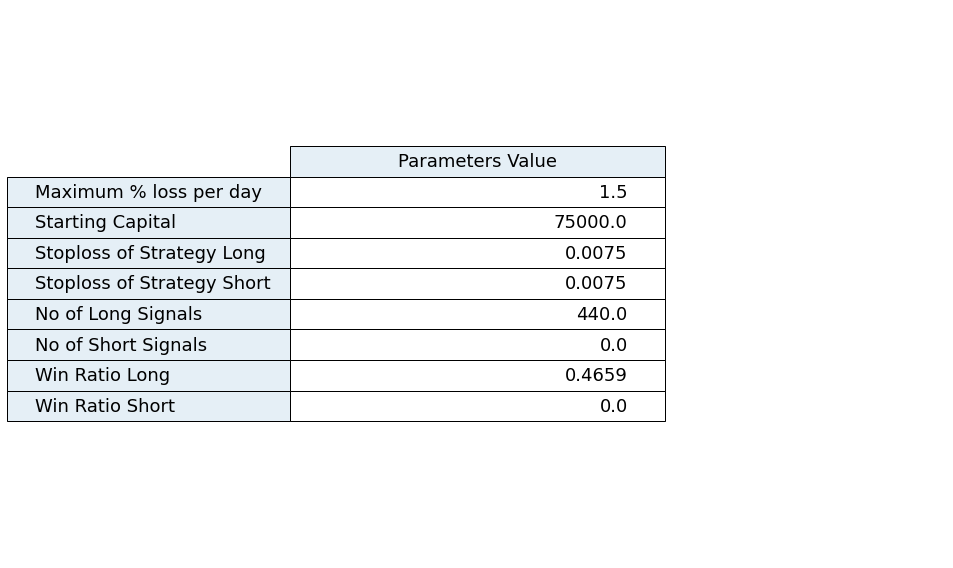

,prediction
1,58.18%
0,41.82%


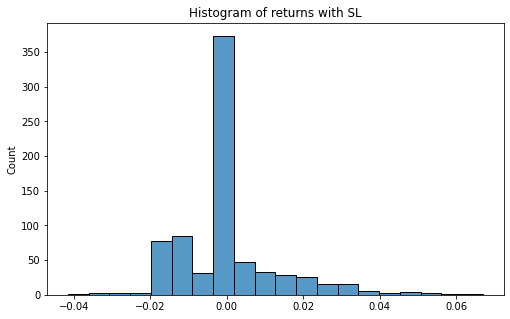

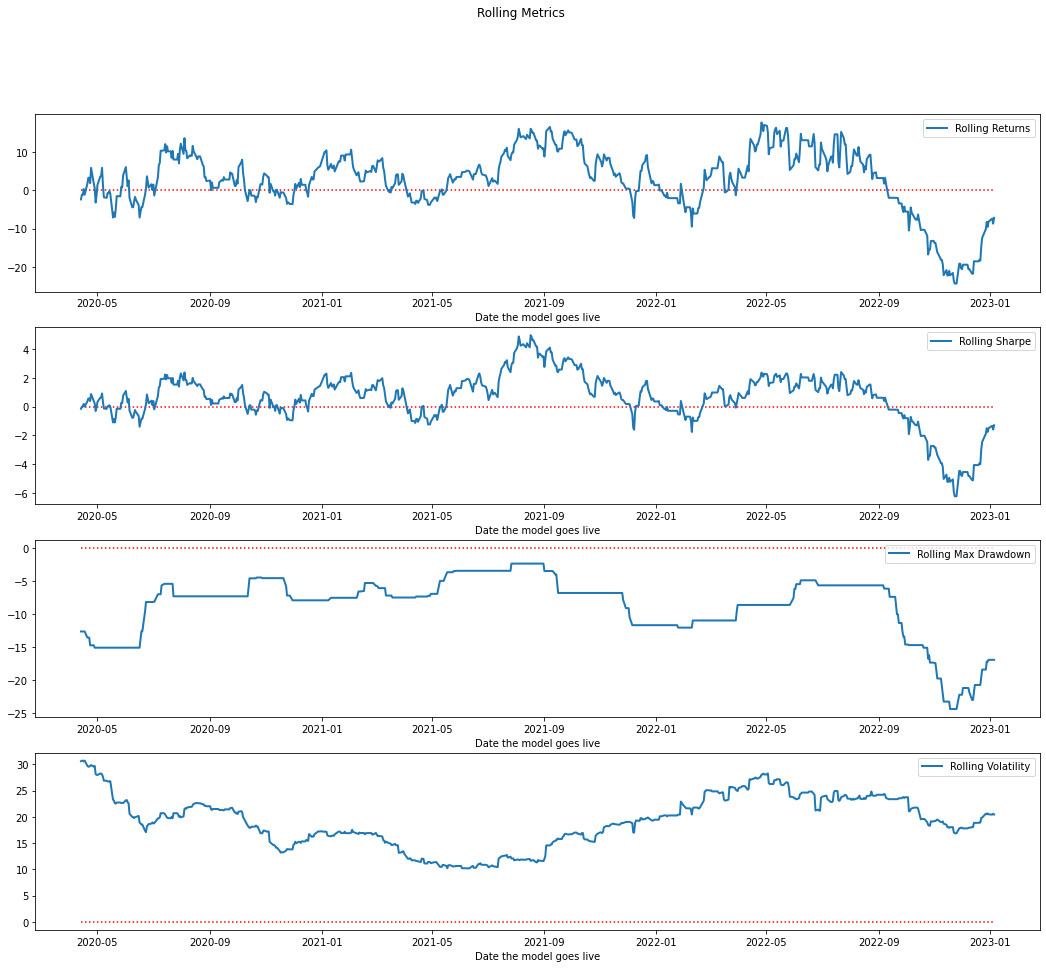

Rolling Metrics [66 days window]
+------------------+--------------------+--------------------+---------------------+
|      Stats       |      Average       |        Max         |         Min         |
+------------------+--------------------+--------------------+---------------------+
|   Total Return   | 2.7595520314215825 | 17.674566297266715 | -24.364762676876882 |
|   Daily Sharpe   | 0.6147740004466963 | 4.954107612158425  |  -6.22826225142485  |
|   Max Drawdown   | -8.700340258461242 | -2.37539015943007  | -24.364762676876886 |
| Daily Volatility | 19.11681910421149  | 30.712457048139967 |  10.174309313425848 |
+------------------+--------------------+--------------------+---------------------+


STOP LOSS STATISTICS
Stop loss hit percent: 24.0 %


,Count
Consecutive SL Hits,
1,38
2,27
3,9
4,4
5,6
8,1
9,1




Rolling SL Analysis [7 day window]
+---------------+---------+------+-----+-----+
|     Stats     | Average | STD  | Max | Min |
+---------------+---------+------+-----+-----+
| SL Hit Counts |   1.68  | 1.16 |  5  |  0  |
+---------------+---------+------+-----+-----+


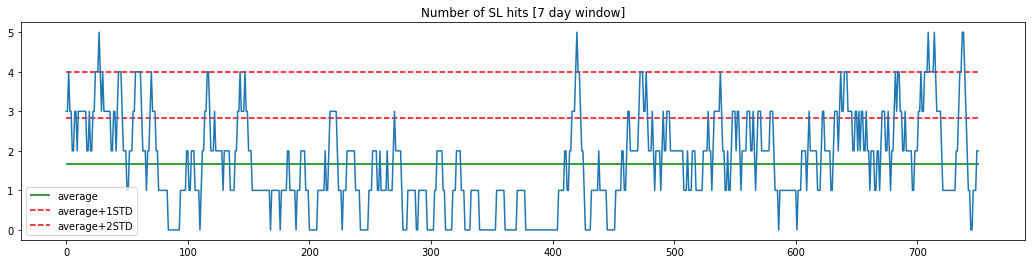

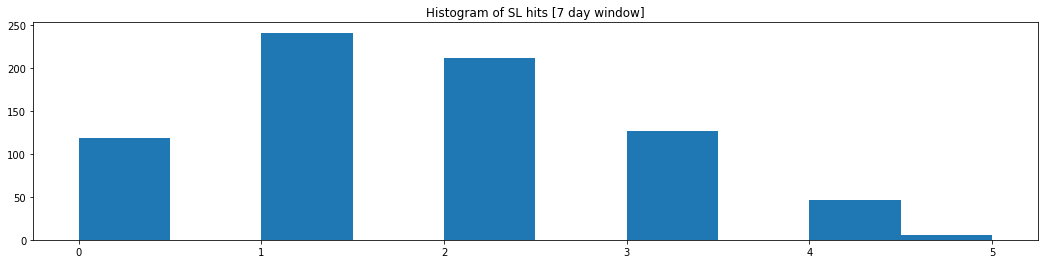

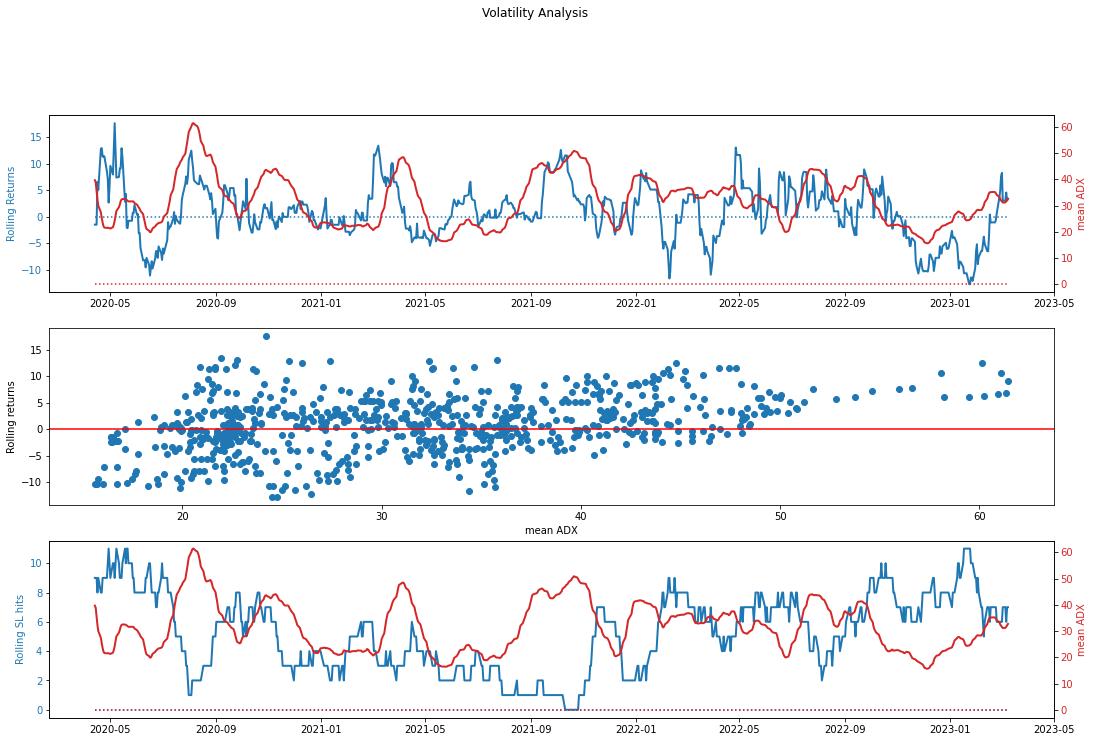

In [98]:
output_df = BackTestAnalysis(
    futures_ohlc,
    start_capital=75000,
    max_loss_per_day=1.5,
    stop_loss_long=0.75/100,
    stop_loss_short=0.75/100,
    contract_size=5,
    excess_liquidity_factor=1200,
    transaction_charge_per_lot=2.57,
    weekend_entry=True,
    slippage=True,
    rolling_analysis_window=66,
    volatility_analysis_window=22,
    save_sheet=False,
    interactive=False,
    stats=True,
    model_name='Model',
    asset_name='SPX',
)